# Read data

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [3]:
# read train.csv
train_df = pd.read_csv("dataset/train.csv")
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1340047,id1614300,1,2016-06-28 16:34:17,2016-06-28 16:44:18,1,-73.981758,40.728512,-73.994804,40.716438,N,601
3393,id2798929,1,2016-06-12 11:57:33,2016-06-12 12:09:23,1,-74.015984,40.705093,-74.004967,40.733894,N,710
1312137,id2966203,2,2016-01-06 22:52:34,2016-01-06 23:00:48,1,-73.985130,40.742065,-73.991486,40.755291,N,494
445451,id2685412,1,2016-06-14 23:33:56,2016-06-14 23:37:03,1,-73.955444,40.773479,-73.953575,40.767273,N,187
608021,id3317305,2,2016-03-06 17:02:12,2016-03-06 17:34:59,1,-73.870903,40.773788,-73.983902,40.676319,N,1967
168782,id3142130,1,2016-06-13 05:50:10,2016-06-13 05:57:08,1,-73.967255,40.793434,-73.982315,40.769337,N,418
597403,id2639590,2,2016-06-23 14:15:07,2016-06-23 14:34:44,1,-73.959953,40.760441,-73.976273,40.751789,N,1177
410651,id3765202,1,2016-05-04 10:49:54,2016-05-04 11:10:34,1,-74.008163,40.738953,-73.995140,40.756153,N,1240
912287,id2592955,2,2016-02-15 09:20:26,2016-02-15 09:25:23,1,-73.990334,40.756138,-74.000481,40.760338,N,297
201672,id1514099,2,2016-05-09 07:01:14,2016-05-09 07:14:09,1,-74.012810,40.715851,-73.979019,40.753971,N,775


In [4]:
# explore train.csv
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# preprocessing data

In [5]:
def preprocessing(data_df):
    # remove any rows with missing data
    data_df = data_df.dropna()

    # convert pickup and dropoff datetime to datetime format
    data_df['pickup_datetime'] = pd.to_datetime(data_df['pickup_datetime'])
    data_df['dropoff_datetime'] = pd.to_datetime(data_df['dropoff_datetime'])

    # split datetime into month, day, week and hour
    data_df['day'] = data_df['pickup_datetime'].dt.day
    data_df['hour'] = data_df['pickup_datetime'].dt.hour
    data_df['month'] = data_df['pickup_datetime'].dt.month
    data_df['week'] = data_df['pickup_datetime'].dt.dayofweek
    return data_df


In [6]:
train_df = preprocessing(train_df)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,month,week
881528,id1653852,2,2016-05-30 01:18:34,2016-05-30 01:25:34,1,-74.002022,40.726357,-74.007584,40.740887,N,420,30,1,5,0
1071105,id1250284,2,2016-01-12 14:48:15,2016-01-12 15:06:04,1,-73.991951,40.738209,-73.978683,40.759140,N,1069,12,14,1,1
285394,id3230978,2,2016-05-11 07:53:37,2016-05-11 08:06:14,4,-73.946159,40.775509,-73.960892,40.772259,N,757,11,7,5,2
756719,id0145885,2,2016-03-25 14:16:15,2016-03-25 14:21:20,2,-73.960167,40.766430,-73.965500,40.771019,N,305,25,14,3,4
1297203,id2820325,1,2016-06-15 18:57:39,2016-06-15 19:17:40,1,-74.026291,40.640099,-74.026291,40.640099,N,1201,15,18,6,2
1109645,id0385541,2,2016-02-21 14:14:17,2016-02-21 14:26:22,1,-73.884163,40.867882,-73.844162,40.857311,N,725,21,14,2,6
1454541,id0137285,2,2016-01-14 13:02:41,2016-01-14 13:29:43,5,-73.982689,40.745045,-73.953346,40.786903,N,1622,14,13,1,3
683041,id1362282,1,2016-04-10 12:58:40,2016-04-10 13:07:21,1,-73.954445,40.784119,-73.972511,40.792595,N,521,10,12,4,6
1205799,id0512414,2,2016-02-19 19:49:07,2016-02-19 20:01:37,5,-73.978958,40.764126,-73.962677,40.794247,N,750,19,19,2,4
974340,id3683126,1,2016-05-26 12:33:02,2016-05-26 12:44:29,1,-73.988831,40.774090,-73.993484,40.755470,N,687,26,12,5,3


# data Analysis & visualization 

In [7]:


def categorical_histogram(data, column):
    categories = data[column].unique()
    num_categories = len(categories)
    colors = plt.cm.tab10(np.linspace(0, 1, num_categories))
    
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color=colors)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Histogram of '+column)
    plt.show()



def numerical_histogram(data, column):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].values, bins=50)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    
    # Set the x-axis tick locator to display integers
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()


## vendor_id

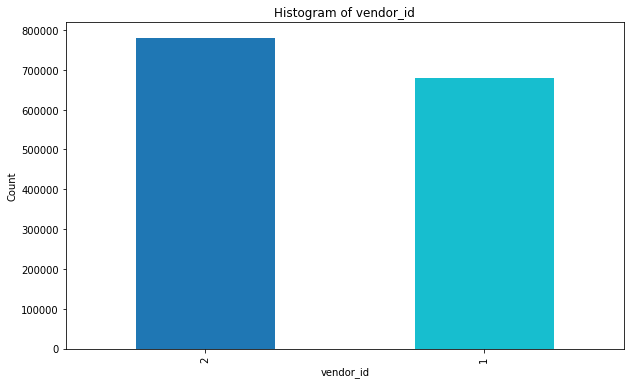

In [8]:
# plot histogram of vendor_id
categorical_histogram(train_df, "vendor_id")

* there are only two vendor_id in the data set, 1 and 2
* vendor_id 2 has more trips than vendor_id 1

## passenger_count

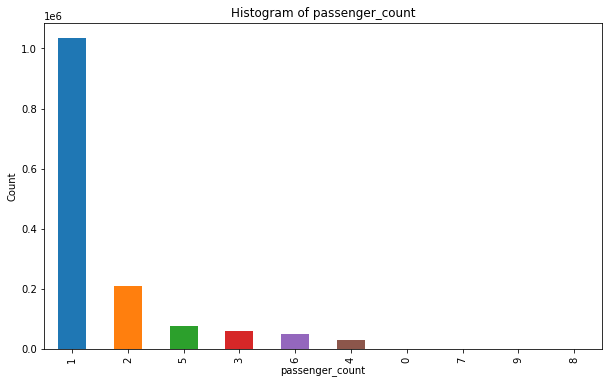

In [9]:
categorical_histogram(train_df, "passenger_count")

* Most of the trips have 1 or 2 passengers

## pickup day and pickup month

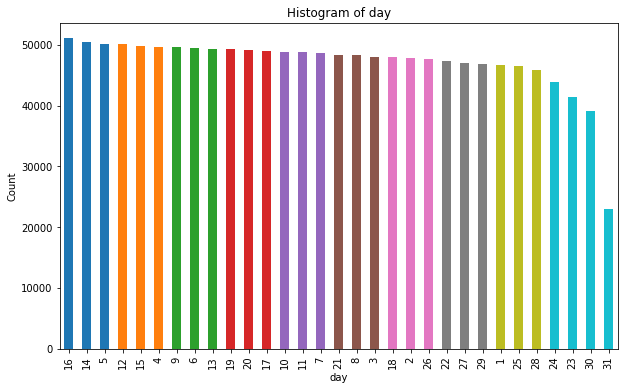

In [10]:
categorical_histogram(train_df, "day")

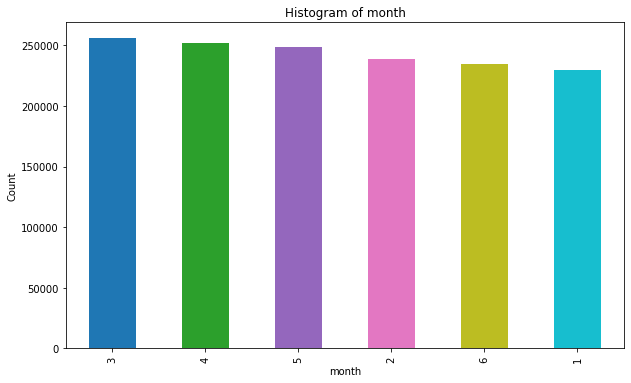

In [11]:
categorical_histogram(train_df, "month")

## pickup hour

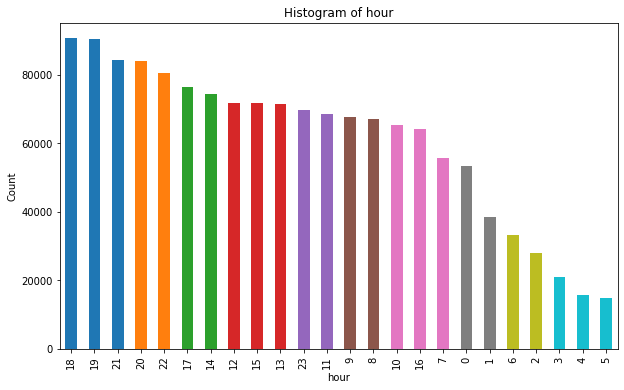

In [12]:
categorical_histogram(train_df, "hour")

* most hours of the day are 6,7 PM

## store_and_fwd_flag

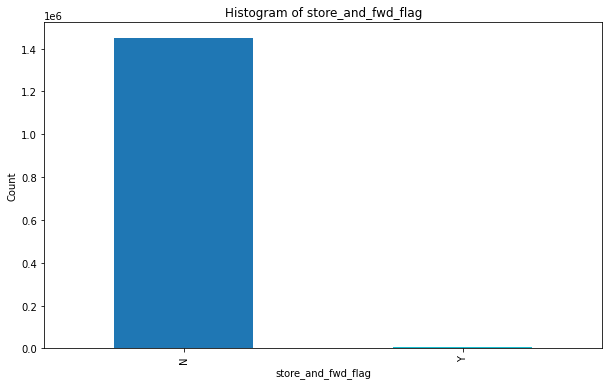

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [13]:
categorical_histogram(train_df, "store_and_fwd_flag")
train_df['store_and_fwd_flag'].value_counts()

* most of the trips are not stored and forwarded In other words, there was a direct connection between the vehicle and the server, allowing the trip data to be sent without the need for temporary storage.

## trip_duration

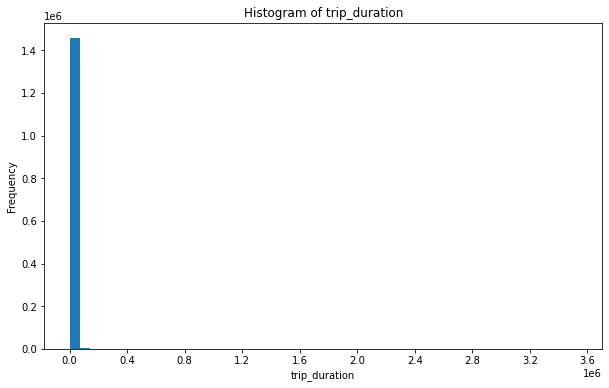

In [14]:
numerical_histogram(train_df, "trip_duration")

## correlation between trip_duration and other features

In [15]:
def plotCorrelation(train_df,col1,col2):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_df[col1], train_df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Scatter plot of '+col1+' vs '+col2)
    plt.show()

In [16]:
# correlation matrix
corr_matrix = train_df.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7164/3367316845.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


trip_duration        1.000000
pickup_longitude     0.026542
vendor_id            0.020304
dropoff_longitude    0.014678
passenger_count      0.008471
month                0.006607
hour                 0.003690
day                  0.000566
week                -0.000708
dropoff_latitude    -0.020677
pickup_latitude     -0.029204
Name: trip_duration, dtype: float64

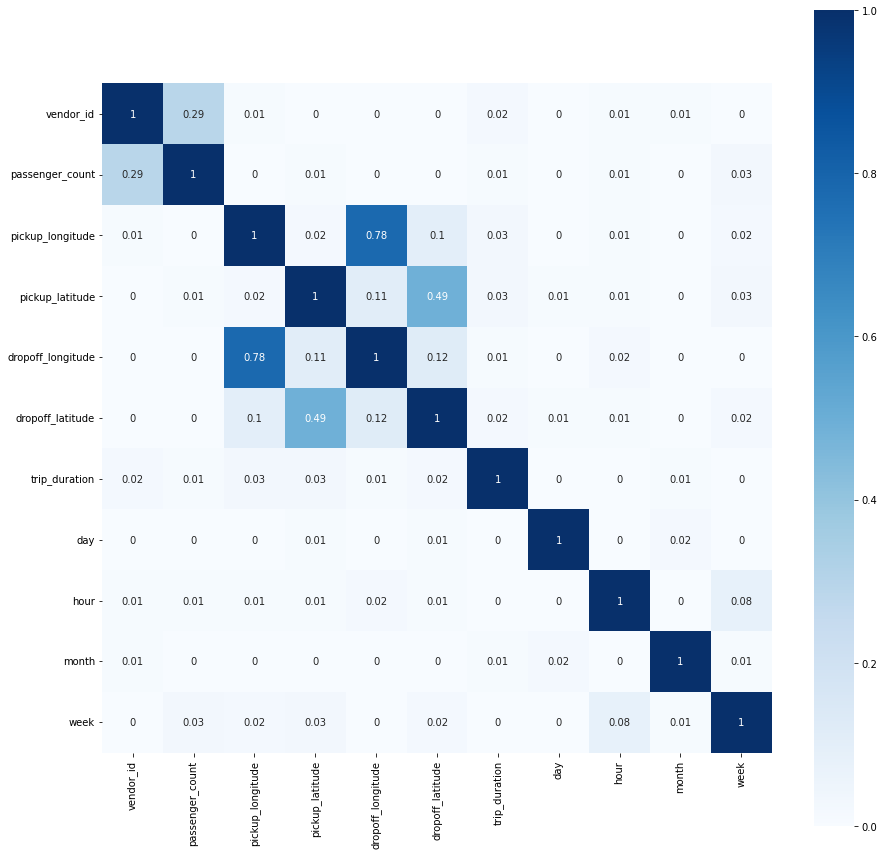

In [17]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(corr_matrix, 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()